In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [316]:
df= pd.read_excel('HRDataset_v13.xlsx')

In [317]:
df.head(20)

,Employee_Name,MaritalStatusID,GenderID,DeptID,PerfScoreID,PayRate,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1,0,1,3,28.50,1,2.04,2,6
1,"LaRotonda, William",2,1,1,3,23.00,1,5.00,4,4
2,"Steans, Tyrone",0,1,1,3,29.00,1,3.90,5,5
3,"Howard, Estelle",1,0,1,3,21.50,2,3.24,3,4
4,"Singh, Nan",0,0,1,3,16.56,2,5.00,3,5
5,"Smith, Leigh Ann",1,0,1,3,20.50,2,3.80,4,4
6,"Bunbury, Jessica",1,0,6,3,55.00,3,3.14,5,0
7,"Carter, Michelle",0,0,6,3,55.00,3,5.00,5,0
8,"Dietrich, Jenna",0,0,6,1,55.00,3,2.30,1,0
9,"Digitale, Alfred",1,1,6,3,56.00,3,3.60,5,0


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee_Name         310 non-null    object 
 1   MaritalStatusID       310 non-null    int64  
 2   GenderID              310 non-null    int64  
 3   DeptID                310 non-null    int64  
 4   PerfScoreID           310 non-null    int64  
 5   PayRate               310 non-null    float64
 6   PositionID            310 non-null    int64  
 7   EngagementSurvey      310 non-null    float64
 8   EmpSatisfaction       310 non-null    int64  
 9   SpecialProjectsCount  310 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 24.3+ KB


In [319]:
df['GenderID'].nunique()

2

In [320]:
df.drop('Employee_Name', inplace=True, axis=1)

In [321]:
df['EmpSatisfaction'].nunique()

5

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MaritalStatusID       310 non-null    int64  
 1   GenderID              310 non-null    int64  
 2   DeptID                310 non-null    int64  
 3   PerfScoreID           310 non-null    int64  
 4   PayRate               310 non-null    float64
 5   PositionID            310 non-null    int64  
 6   EngagementSurvey      310 non-null    float64
 7   EmpSatisfaction       310 non-null    int64  
 8   SpecialProjectsCount  310 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.9 KB


In [323]:
df.columns

Index(['MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PayRate',
       'PositionID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount'],
      dtype='object')

In [324]:
df['PositionID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 29, 28], dtype=int64)

In [325]:
df['PositionID'].value_counts().head(10)

19    136
20     57
3      27
18     13
24      9
14      8
9       8
15      5
28      5
8       5
Name: PositionID, dtype: int64

In [326]:
#Converting 'PositionID' variable into a 3 value category.Otherwise when dummy variable is created , it will end up creating 29 variables
df['PositionID'][df['PositionID'] <=10 ]=1

df['PositionID'][(df['PositionID']>10) & (df['PositionID']<=20)]=2
df['PositionID'][df['PositionID']>20]=3


C:\IDE\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\IDE\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\IDE\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [327]:
#Converting target variable into  a binary value variable to do logistic regression
df['PerfScoreID'][df['PerfScoreID']!=3]=0
df['PerfScoreID'][df['PerfScoreID']==3]=1

C:\IDE\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\IDE\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [328]:
df['PositionID'].value_counts()

2    227
1     54
3     29
Name: PositionID, dtype: int64

In [329]:
#Changing the datatype of categorical variable

df[['GenderID', 'DeptID','MaritalStatusID','PositionID', 'EmpSatisfaction']]= df[['GenderID', 'DeptID','MaritalStatusID','PositionID', 'EmpSatisfaction']].astype('category')

In [330]:
df.columns

Index(['MaritalStatusID', 'GenderID', 'DeptID', 'PerfScoreID', 'PayRate',
       'PositionID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount'],
      dtype='object')

In [331]:
cols = ['MaritalStatusID', 'GenderID', 'DeptID','EmpSatisfaction','PerfScoreID','PayRate', 'PositionID', 'EngagementSurvey','SpecialProjectsCount']
df= df[cols]
df.head()


,MaritalStatusID,GenderID,DeptID,EmpSatisfaction,PerfScoreID,PayRate,PositionID,EngagementSurvey,SpecialProjectsCount
0,1,0,1,2,1,28.50,1,2.04,6
1,2,1,1,4,1,23.00,1,5.00,4
2,0,1,1,5,1,29.00,1,3.90,5
3,1,0,1,3,1,21.50,1,3.24,4
4,0,0,1,3,1,16.56,1,5.00,5


In [332]:
df['GenderID'].nunique()

2

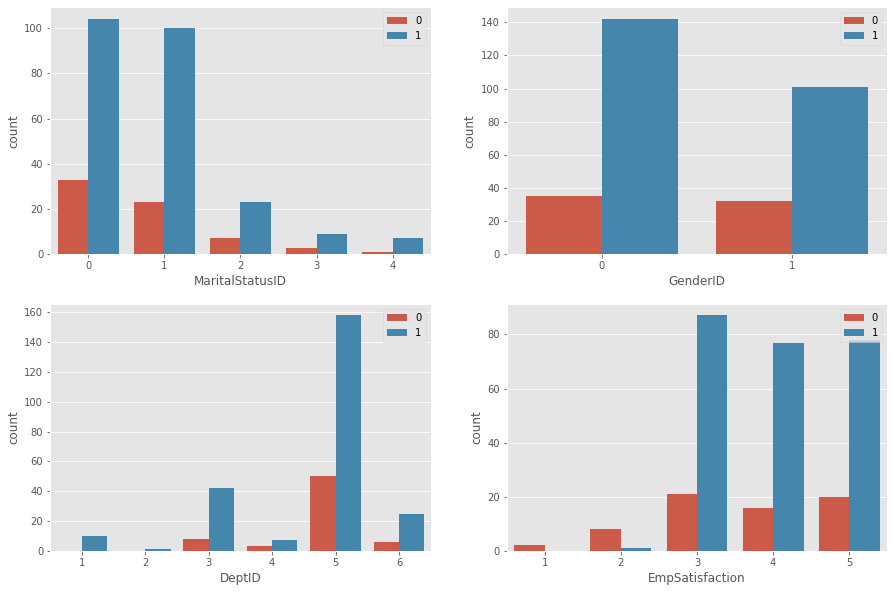

In [333]:
plt.figure(figsize=(15,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    
    sns.countplot(x=df.iloc[:,i-1], hue='PerfScoreID', data=df,)
    plt. legend(loc='upper right')

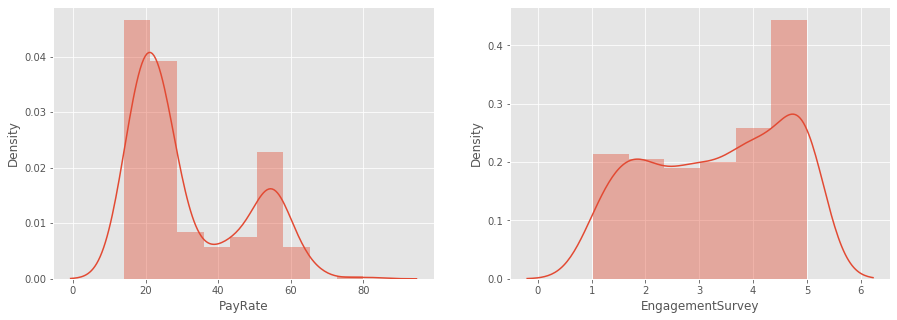

In [334]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['PayRate'],kde=True)
plt.subplot(1,2,2)
sns.distplot(df['EngagementSurvey'],kde=True)

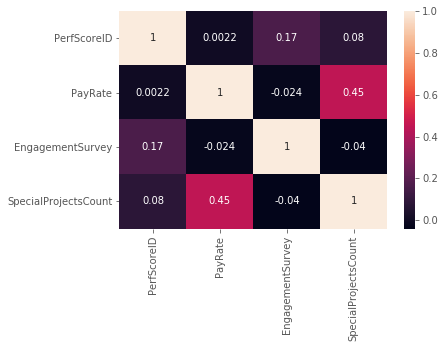

In [335]:
sns.heatmap(df.corr(), annot=True)

In [336]:
X = df.drop('PerfScoreID', axis=1)
y=df['PerfScoreID']
y.value_counts()
y.dtype

dtype('int64')

### Dealing with  categorical variable 

In [337]:
df_dummy = pd.get_dummies(X, drop_first=True)
df_dummy.head()



,PayRate,EngagementSurvey,SpecialProjectsCount,MaritalStatusID_1,MaritalStatusID_2,MaritalStatusID_3,MaritalStatusID_4,GenderID_1,DeptID_2,DeptID_3,DeptID_4,DeptID_5,DeptID_6,EmpSatisfaction_2,EmpSatisfaction_3,EmpSatisfaction_4,EmpSatisfaction_5,PositionID_2,PositionID_3
0,28.50,2.04,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,23.00,5.00,4,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,29.00,3.90,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,21.50,3.24,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,16.56,5.00,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [338]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(df_dummy)
y

0      1
1      1
2      1
3      1
4      1
      ..
305    1
306    1
307    1
308    1
309    1
Name: PerfScoreID, Length: 310, dtype: int64

In [339]:
log_reg = sm.Logit(y,X_scaled).fit()


         Current function value: inf
         Iterations: 35


C:\IDE\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\IDE\Anaconda\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [ ]:
print(log_reg.summary())